[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Vovam\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


Accuracy: 0.805
Text: plot : two teen couples go to a church party , drink and then drive . 
they get into an accident . 
one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . 
what's the deal ? 
watch the movie and " sorta " find out . . . 
critique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . 
which is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn't snag this one correctly . 
they seem to have taken this pretty neat concept , but executed it terribly . 
so what are the problems with the movie ? 
well , its main problem is that it's simply too jumbled . 
it starts off " normal " but then downshifts into this " fantasy " world in which you , as an audien

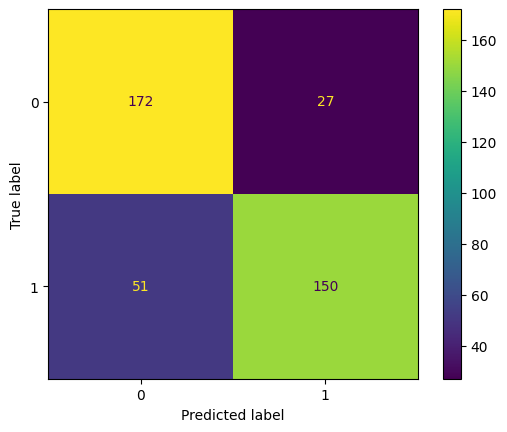

In [5]:
import nltk
from nltk.corpus import movie_reviews
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import spacy
import re
import pandas as pd

# Завантажуємо необхідні дані
nltk.download('movie_reviews')

# Завантажуємо відгуки та мітки
texts = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
labels = [1 if movie_reviews.categories(fileid)[0] == 'pos' else 0 for fileid in movie_reviews.fileids()]  # Отримуємо мітку залежно від категорії

# Створюємо DataFrame
data = pd.DataFrame({'review': texts, 'sentiment': labels})

# Функція для очистки тексту
def clean_text(text):
    text = text.lower()  # Переводимо текст у нижній регістр
    text = re.sub(r'[^\w\s]', '', text)  # Видаляємо пунктуацію
    text = re.sub(r'\s+', ' ', text).strip()  # Видаляємо зайві пробіли
    return text

# Очищення текстів
data['cleaned_text'] = data['review'].apply(clean_text)

# Завантажуємо мовну модель spaCy
nlp = spacy.load("en_core_web_sm")

# Лемматизація
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join(token.lemma_ for token in doc)

data['lemmatized_text'] = data['cleaned_text'].apply(lemmatize_text)

# TF-IDF векторизація
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['lemmatized_text'])

# Розділення даних
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Навчання моделі
model = MultinomialNB()
model.fit(X_train, y_train)

# Передбачення
y_pred = model.predict(X_test)

# Оцінка точності
print("Accuracy:", accuracy_score(y_test, y_pred))

# Побудова матриці похибок
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

# Приклади передбачень
for i in range(5):
    print(f"Text: {data['review'].iloc[i]}")
    print(f"Predicted label: {'positive' if model.predict(vectorizer.transform([data['lemmatized_text'].iloc[i]]))[0] == 1 else 'negative'}")
